In [1]:
import numpy as np
import sympy as sp

In [2]:
x, y = sp.symbols('x, y')

In [6]:
sp.solve({x**2-2, y-3}, x, y)

[(-sqrt(2), 3), (sqrt(2), 3)]

In [5]:
sp.solve(x**2-2*x +4, x)

[1 - sqrt(3)*I, 1 + sqrt(3)*I]

In [8]:
sp.solve({x**2-4+y, y-3}, x, y)

[(-1, 3), (1, 3)]

In [9]:
x_r, x_theta, y_r, y_theta, dx, dy, dtheta, dr = sp.symbols('x_r, x_theta, y_r, y_theta, dx, dy, dtheta, dr' )

In [10]:
eq1 = x_r*dr +x_theta*dtheta -dx
eq2 = y_r*dr + y_theta*dtheta - dy

In [12]:
ans = sp.solve({eq1, eq2}, dr, dtheta)

In [14]:
ans

{dr: (dx*y_theta - dy*x_theta)/(x_r*y_theta - x_theta*y_r),
 dtheta: (-dx*y_r + dy*x_r)/(x_r*y_theta - x_theta*y_r)}

## Numpy Now

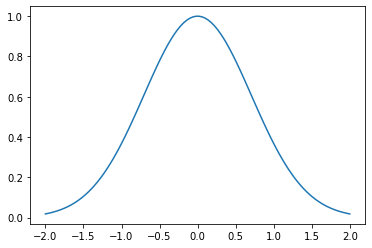

In [6]:
import numpy as np
x = np.linspace(-2,2, 100)
y = np.linspace(-2,2, 100)
import matplotlib.pyplot as plt

plt.plot(x, np.exp(-x**2))

In [9]:
%matplotlib notebook

In [17]:
X, Y = np.meshgrid(x, y)

z = np.exp(-X**2-Y**2)

def gradient(x,y):
    return -2*x*np.exp(-x**2-y**2), -2*y*np.exp(-x**2-y**2)
def f(x,y):
    return np.exp(-x**2-y**2)
def deriv_z(x, y, v):
    h = 0.000001
    derivative = (f(x+h*v[0], y+h*v[1])-f(x,y))/h
    return derivative

In [16]:
deriv_z(0.5,0, [-1,-1])

0.778799614797876

<IPython.core.display.Javascript object>


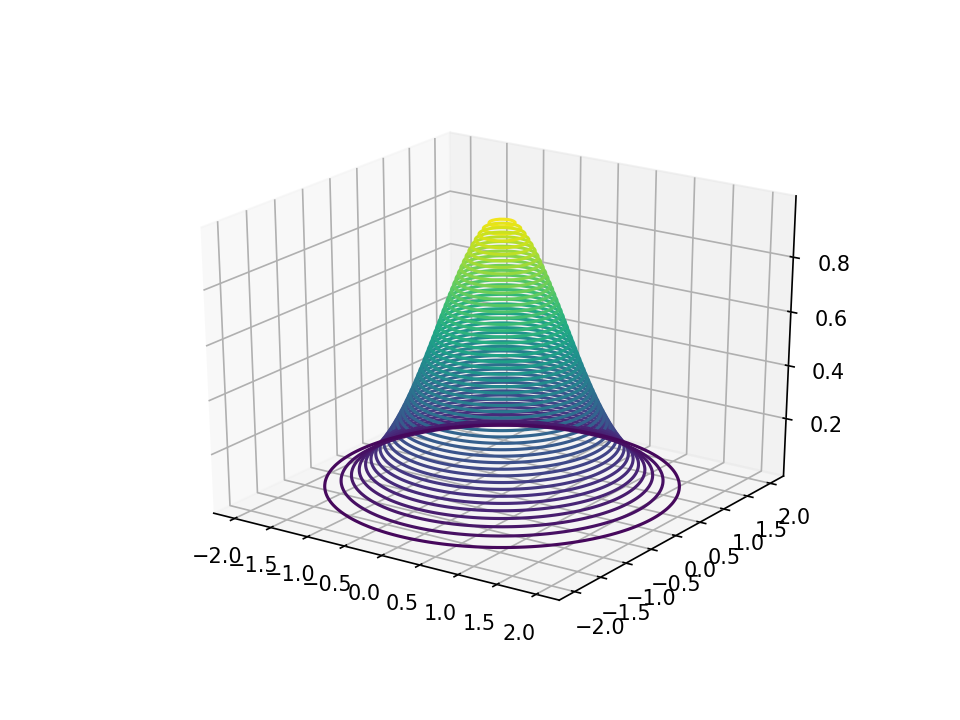

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, z, 50)

In [ ]:
def gradient(x,y):
    return -2*x*np.exp(-x**2-y**2), -2*y*np.exp(-x**2-y**2)
def f(x,y):
    return np.exp(-x**2-y**2)

In [22]:
F = np.zeros((100,100))

i = 0
for x_value in x:
    j = 0
    for y_value in y:
        F[i,j] = f(x_value, y_value)
        j += 1
    i += 1

G = np.zeros((100,100))
i = 0
for x_value in x:
    j = 0
    for y_value in y:
        G[i,j] = gradient(x_value, y_value)
        j += 1
    i += 1

ValueError: setting an array element with a sequence.

<IPython.core.display.Javascript object>


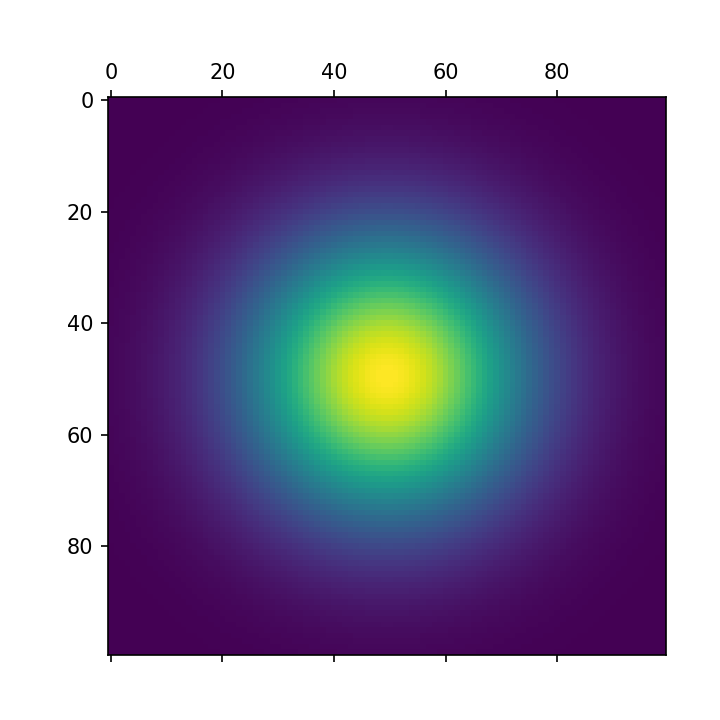

In [23]:
plt.matshow(F)

<IPython.core.display.Javascript object>


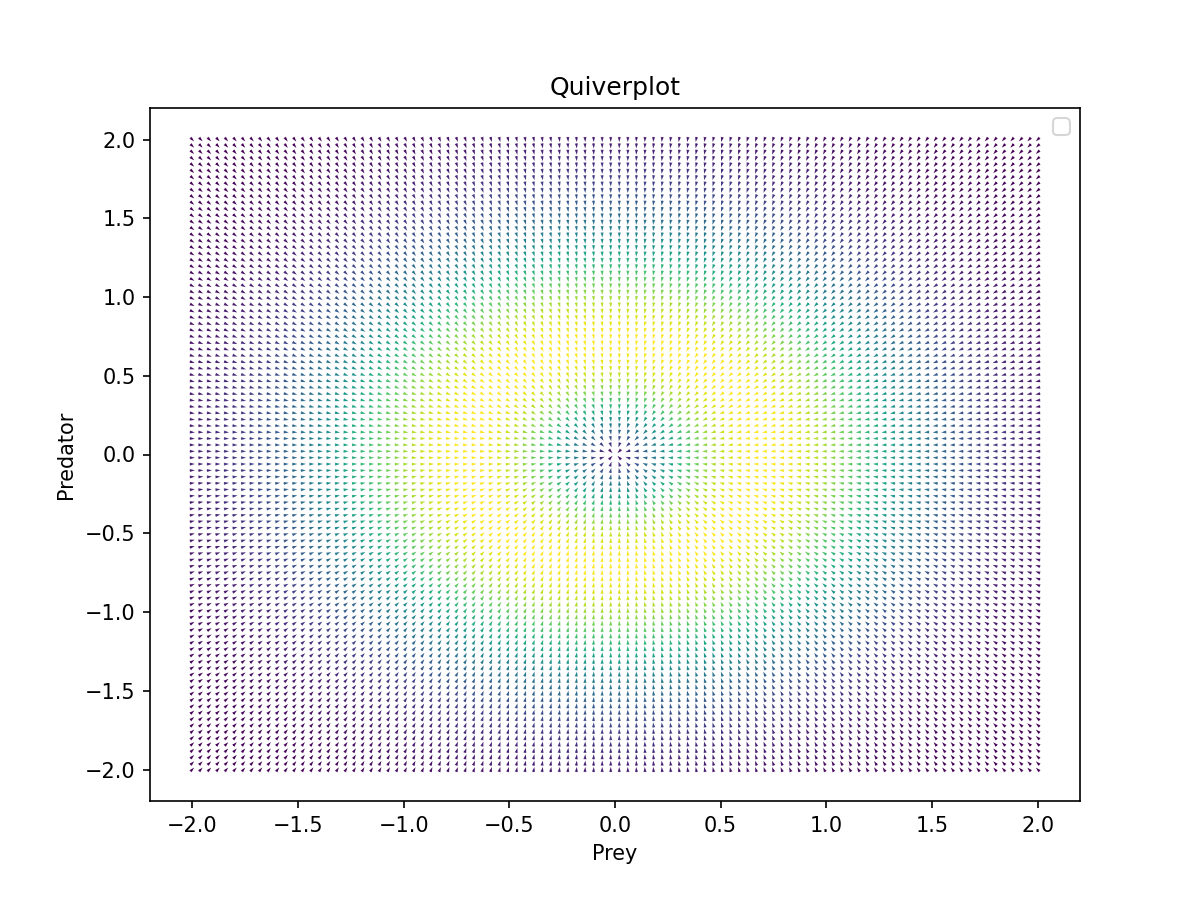

No handles with labels found to put in legend.


In [30]:
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)
ax4.set_title("Quiverplot")
ax4.set_xlabel("Prey")
ax4.set_ylabel("Predator")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point

                  # create a grid
DX1, DY1 = gradient(X, Y)  
M = (np.hypot(DX1, DY1))    # compute growth rate on the grid
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X, Y, DX1, DY1,  M, pivot='mid')